# Image Scraping and Classification Project

### Problem Statement: 

Images are one of the major sources of data in the field of data science and AI. This field is making appropriate use of information that can be gathered through images by examining its features and details. We are trying to give you an exposure of how an end to end project is developed in this field. 

The idea behind this project is to build a deep learning-based Image Classification model on images that will be scraped from e-commerce portal. This is done to make the model more and more robust. 

This task is divided into two phases: Data Collection and Mode Building. 

1. Data Collection Phase: 

In this section, you need to scrape images from e-commerce portal, Amazon.com. The clothing categories used for scraping will be:
-	Sarees (women)
-	Trousers (men)
-	Jeans (men)

2. Model Building Phase: After the data collection and preparation is done, you need to build an image classification model that will classify between these 3 categories mentioned above. 


## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from os import listdir
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Importing the Data

In [2]:
train_data=r'Clothes/Train'
test_data=r'Clothes/Test'

## Displaying Images

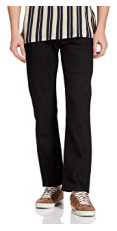

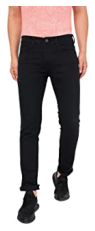

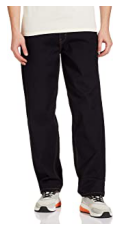

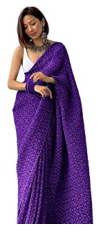

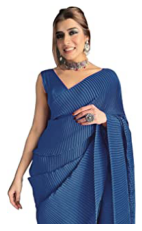

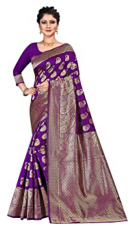

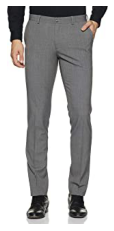

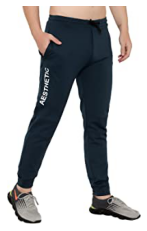

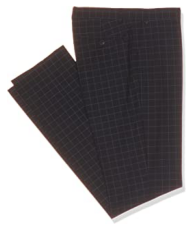

In [3]:
# Let's try to print some of the scrapped images from each category
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

train_jeans=r'Clothes/Train/Jeans_Images'
train_saree=r'Clothes/Train/Sarees_Images'
train_trouser=r'Clothes/Train/Trousers_Images'


Cloth_train=[train_jeans, train_saree, train_trouser]
for dirs in Cloth_train:
    k=listdir(dirs)
    for i in k[:3]:
        img=mpimg.imread('{}/{}'.format(dirs,i))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

In [4]:
file1 = listdir(r'Clothes/train')
file2 = listdir(r'Clothes/test')
file1, file2

(['Jeans_Images', 'Sarees_Images', 'Trousers_Images'],
 ['Jeans_Images', 'Sarees_Images', 'Trousers_Images'])

In [5]:
# Count of images in each folder
print("Count of Training Images")
print("No.of Images of Sarees in train dataset -> ",len(os.listdir(r'Clothes\train\Sarees_Images')))
print("No.of Images of Jeans in train dataset -> ",len(os.listdir(r'Clothes\train\Jeans_Images')))
print("No.of Images of Trousers in train dataset ->",len(os.listdir(r'Clothes\train\Trousers_Images')))
"\n"

print("Count of Test Images")
print("No.of Images of Sarees in test dataset-> ",len(os.listdir(r'Clothes\test\Sarees_Images')))
print("No.of Images of Jeans in test dataset ->",len(os.listdir(r'Clothes\test\Jeans_Images')))
print("No.of Images of Trousers in test dataset-> ",len(os.listdir(r'Clothes\test\Trousers_Images')))

Count of Training Images
No.of Images of Sarees in train dataset ->  476
No.of Images of Jeans in train dataset ->  476
No.of Images of Trousers in train dataset -> 476
Count of Test Images
No.of Images of Sarees in test dataset->  204
No.of Images of Jeans in test dataset -> 204
No.of Images of Trousers in test dataset->  204


## Model Building

In [6]:
#importing all the required libraries
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras import optimizers
from keras.models import load_model
from tensorflow.keras.preprocessing import image
import random
import scipy
import pylab as pl
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings 
warnings.filterwarnings("ignore")

In [7]:
#Defining dimensions of images and other parameters
input_shape=(128,128,3)
img_width=128
img_height=128
batch_size=12
epoch=100
train_samples=476
test_samples=204

In [8]:
# Data Augmentation on Training Images

Train_datagen=ImageDataGenerator(rescale=1./255,
                                             zoom_range=0.2,
                                             rotation_range=30,
                                             horizontal_flip=True)
Training_set=Train_datagen.flow_from_directory(train_data,
                                                              target_size=(img_width,img_height),
                                                              batch_size=batch_size, 
                                                              class_mode='categorical')

# Test Data Generator
Test_datagen=ImageDataGenerator(rescale=1./255)
Test_set=Test_datagen.flow_from_directory(test_data,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size, 
                                                  class_mode='categorical')

Found 1428 images belonging to 3 classes.
Found 612 images belonging to 3 classes.


In [9]:
# Creating the model
model=Sequential()

# First convolution layer
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Second convolution layer
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Fourth convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 activation (Activation)     (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 61, 61, 32)        0         
                                                        

In [10]:
# Defining Early stopping and Model check point
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
MC = ModelCheckpoint('best.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [11]:
# Fitting the Training Data
history = model.fit(
    Training_set, 
    epochs=epoch,
    validation_data=Test_set,
    validation_steps=test_samples//batch_size,
    steps_per_epoch=train_samples//batch_size,
    callbacks=[ES,MC])

Epoch 1/100
39/39 [==============================] - ETA: 0s - loss: 1.1106 - accuracy: 0.4103
Epoch 1: val_accuracy improved from -inf to 0.66667, saving model to best.h5
39/39 [==============================] - 15s 346ms/step - loss: 1.1106 - accuracy: 0.4103 - val_loss: 1.0226 - val_accuracy: 0.6667
Epoch 2/100
39/39 [==============================] - ETA: 0s - loss: 0.7267 - accuracy: 0.6731
Epoch 2: val_accuracy improved from 0.66667 to 0.69608, saving model to best.h5
39/39 [==============================] - 11s 289ms/step - loss: 0.7267 - accuracy: 0.6731 - val_loss: 0.7155 - val_accuracy: 0.6961
Epoch 3/100
39/39 [==============================] - ETA: 0s - loss: 0.5717 - accuracy: 0.6859
Epoch 3: val_accuracy improved from 0.69608 to 0.71569, saving model to best.h5
39/39 [==============================] - 11s 280ms/step - loss: 0.5717 - accuracy: 0.6859 - val_loss: 0.5381 - val_accuracy: 0.7157
Epoch 4/100
39/39 [==============================] - ETA: 0s - loss: 0.6064 - accu

39/39 [==============================] - 10s 266ms/step - loss: 0.3648 - accuracy: 0.8355 - val_loss: 0.4660 - val_accuracy: 0.8088
Epoch 30/100
39/39 [==============================] - ETA: 0s - loss: 0.3946 - accuracy: 0.8184
Epoch 30: val_accuracy did not improve from 0.89706
39/39 [==============================] - 12s 301ms/step - loss: 0.3946 - accuracy: 0.8184 - val_loss: 0.2968 - val_accuracy: 0.8676
Epoch 31/100
39/39 [==============================] - ETA: 0s - loss: 0.3636 - accuracy: 0.8226
Epoch 31: val_accuracy did not improve from 0.89706
39/39 [==============================] - 11s 280ms/step - loss: 0.3636 - accuracy: 0.8226 - val_loss: 0.3319 - val_accuracy: 0.8775
Epoch 32/100
39/39 [==============================] - ETA: 0s - loss: 0.3331 - accuracy: 0.8440
Epoch 32: val_accuracy did not improve from 0.89706
39/39 [==============================] - 12s 299ms/step - loss: 0.3331 - accuracy: 0.8440 - val_loss: 0.2800 - val_accuracy: 0.8922
Epoch 33/100
39/39 [========

39/39 [==============================] - 11s 269ms/step - loss: 0.3178 - accuracy: 0.8419 - val_loss: 0.2163 - val_accuracy: 0.9461
Epoch 59/100
39/39 [==============================] - ETA: 0s - loss: 0.2891 - accuracy: 0.8611
Epoch 59: val_accuracy did not improve from 0.94608
39/39 [==============================] - 10s 263ms/step - loss: 0.2891 - accuracy: 0.8611 - val_loss: 0.2439 - val_accuracy: 0.9167
Epoch 60/100
39/39 [==============================] - ETA: 0s - loss: 0.2536 - accuracy: 0.8825
Epoch 60: val_accuracy did not improve from 0.94608
39/39 [==============================] - 10s 265ms/step - loss: 0.2536 - accuracy: 0.8825 - val_loss: 0.1956 - val_accuracy: 0.9265
Epoch 61/100
39/39 [==============================] - ETA: 0s - loss: 0.2192 - accuracy: 0.9017
Epoch 61: val_accuracy did not improve from 0.94608
39/39 [==============================] - 11s 270ms/step - loss: 0.2192 - accuracy: 0.9017 - val_loss: 0.1448 - val_accuracy: 0.9461
Epoch 62/100
39/39 [========

Epoch 88/100
39/39 [==============================] - ETA: 0s - loss: 0.1812 - accuracy: 0.9209
Epoch 88: val_accuracy did not improve from 0.97059
39/39 [==============================] - 10s 266ms/step - loss: 0.1812 - accuracy: 0.9209 - val_loss: 0.1229 - val_accuracy: 0.9412
Epoch 89/100
39/39 [==============================] - ETA: 0s - loss: 0.1909 - accuracy: 0.9060
Epoch 89: val_accuracy did not improve from 0.97059
39/39 [==============================] - 10s 265ms/step - loss: 0.1909 - accuracy: 0.9060 - val_loss: 0.1358 - val_accuracy: 0.9608
Epoch 90/100
39/39 [==============================] - ETA: 0s - loss: 0.1276 - accuracy: 0.9423
Epoch 90: val_accuracy did not improve from 0.97059
39/39 [==============================] - 10s 264ms/step - loss: 0.1276 - accuracy: 0.9423 - val_loss: 0.1189 - val_accuracy: 0.9265
Epoch 91/100
39/39 [==============================] - ETA: 0s - loss: 0.1456 - accuracy: 0.9316
Epoch 91: val_accuracy did not improve from 0.97059
39/39 [=====

In [12]:
#Saving the best model
model.save('best_model.h5')

In [13]:
table = pd.DataFrame(model.history.history)
table

,loss,accuracy,val_loss,val_accuracy
0,1.110609,0.410256,1.022551,0.666667
1,0.726704,0.673077,0.715549,0.696078
2,0.571662,0.685897,0.538096,0.715686
3,0.606424,0.649573,0.544002,0.681373
4,0.596986,0.658120,0.730299,0.691176
...,...,...,...,...
95,0.226168,0.905983,0.124297,0.960784
96,0.191387,0.925214,0.098812,0.970588
97,0.170083,0.929487,0.130494,0.926471
98,0.186879,0.923077,0.103178,0.960784


## Prediction

In [14]:
#Loading the saved model
saved_model = load_model('best_model.h5')

#creating instances where elements from test directory will be called
test_jeans=r'Clothes\test\Jeans_Images'
test_saree=r'Clothes\test\Sarees_Images'
test_trouser=r'Clothes\test\Trousers_Images'

In [ ]:
test_dire=[test_jeans,test_saree,test_trouser]

for test_dir in test_dire:
    for i in listdir(test_dir):
        print("Input Image is:",i)
        img= image.load_img('{}/{}'.format(test_dir,i))                         
        test_image = image.load_img('{}/{}'.format(test_dir,i),target_size=(128, 128))
        test_image = image.img_to_array(test_image)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        test_image = np.expand_dims(test_image, axis=0)
        result = saved_model.predict(test_image)
        print("Predicted Label is:",np.argmax(result, axis=1),"\n")